In [74]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [75]:
filename='C:/Users/jhjjh/OneDrive/바탕 화면/2학년/데이터처리프로그래밍/source/11장/age.csv'

In [76]:
data=pd.read_csv(filename)

In [77]:
data.columns

Index(['Diameter', 'Height', 'Whole_Weight', 'Viscra_Weight', 'Shell_Weight',
       'Group'],
      dtype='object')

In [78]:
data

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight,Group
0,0.525,0.195,1.3700,0.2955,0.4070,2.0
1,0.275,0.095,0.2170,0.0435,0.0900,1.0
2,0.470,0.165,0.9975,0.2420,0.3300,0.0
3,0.450,0.140,1.0130,0.2160,0.3600,0.0
4,0.380,0.135,0.6810,0.1420,0.1700,0.0
...,...,...,...,...,...,...
997,0.450,0.160,0.9980,0.2140,0.3010,0.0
998,0.260,0.100,0.1920,0.0585,0.0700,1.0
999,0.505,0.175,1.2075,0.2620,0.3900,0.0
1000,0.300,0.105,0.3040,0.0610,0.0805,1.0


In [79]:
data6 = data. loc[:,['Diameter', 'Height', 'Whole_Weight', 'Viscra_Weight', 'Shell_Weight',
       'Group']]
year0 = data[data['Group'] == 0.0]
year1 = data[data['Group'] == 1.0]
year2 = data[data['Group'] == 2.0]


In [80]:
data

,Diameter,Height,Whole_Weight,Viscra_Weight,Shell_Weight,Group
0,0.525,0.195,1.3700,0.2955,0.4070,2.0
1,0.275,0.095,0.2170,0.0435,0.0900,1.0
2,0.470,0.165,0.9975,0.2420,0.3300,0.0
3,0.450,0.140,1.0130,0.2160,0.3600,0.0
4,0.380,0.135,0.6810,0.1420,0.1700,0.0
...,...,...,...,...,...,...
997,0.450,0.160,0.9980,0.2140,0.3010,0.0
998,0.260,0.100,0.1920,0.0585,0.0700,1.0
999,0.505,0.175,1.2075,0.2620,0.3900,0.0
1000,0.300,0.105,0.3040,0.0610,0.0805,1.0


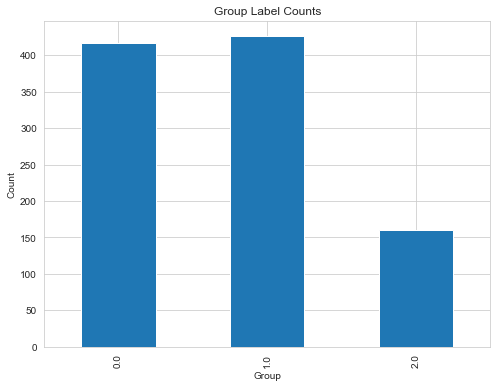

In [81]:
group_counts = data['Group'].value_counts().sort_index()
plt.figure(figsize=(8, 6))  # 그래프 크기 설정

# 막대 그래프 그리기
group_counts.plot(kind='bar')

# 그래프 제목과 축 레이블 추가
plt.title('Group Label Counts')
plt.xlabel('Group')
plt.ylabel('Count')

plt.show()  # 그래프 표시


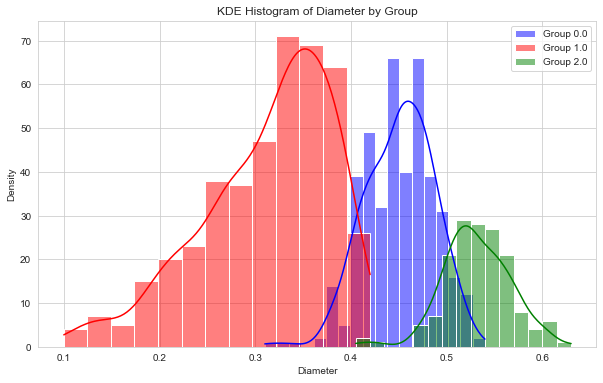

In [82]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

sns.histplot(year0['Diameter'], kde=True, color='blue', label='Group 0.0')
sns.histplot(year1['Diameter'], kde=True, color='red', label='Group 1.0')
sns.histplot(year2['Diameter'], kde=True, color='green', label='Group 2.0')

# 그래프 제목과 축 레이블 추가
plt.title('KDE Histogram of Diameter by Group')
plt.xlabel('Diameter')
plt.ylabel('Density')

plt.legend()  # 범례 추가
plt.show()  # 그래프 표시



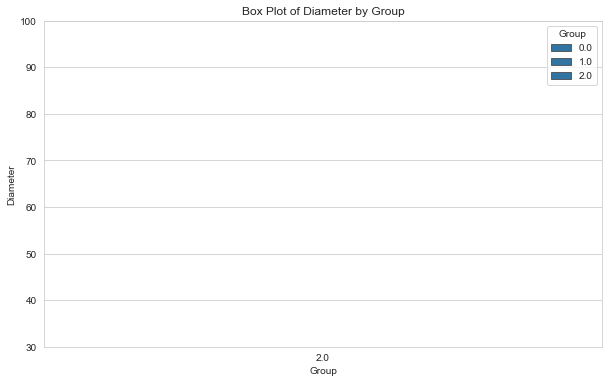

In [83]:
plt.figure(figsize=(10,6))
plt.title('Box Plot of Diameter by Group')

sns.boxplot(x='Group',y='Diameter',hue='Group',data=year0)
sns.boxplot(x='Group',y='Diameter',hue='Group',data=year1)
sns.boxplot(x='Group',y='Diameter',hue='Group',data=year2)

plt.xlabel('Group')
plt.ylabel('Diameter')
plt.ylim(30,100)
plt.show()

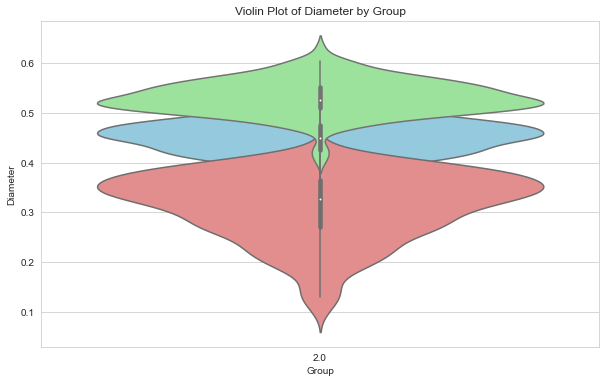

In [84]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정

sns.violinplot(x='Group', y='Diameter', data=year0, color='skyblue')
sns.violinplot(x='Group', y='Diameter', data=year1, color='lightcoral')
sns.violinplot(x='Group', y='Diameter', data=year2, color='lightgreen')

# 그래프 제목과 축 레이블 추가
plt.title('Violin Plot of Diameter by Group')
plt.xlabel('Group')
plt.ylabel('Diameter')

plt.show()

In [85]:
new_df = data[['Diameter', 'Height', 'Group']]

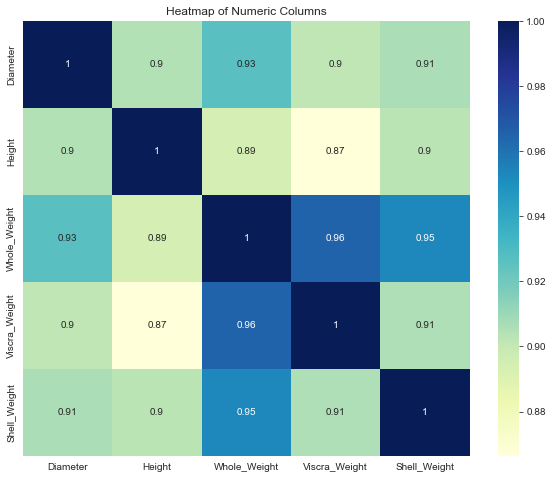

In [86]:
data_without_group = data.drop('Group', axis=1)

plt.figure(figsize=(10, 8))
sns.heatmap(data_without_group.corr(), annot=True, cmap='YlGnBu')

plt.title('Heatmap of Numeric Columns')
plt.show()

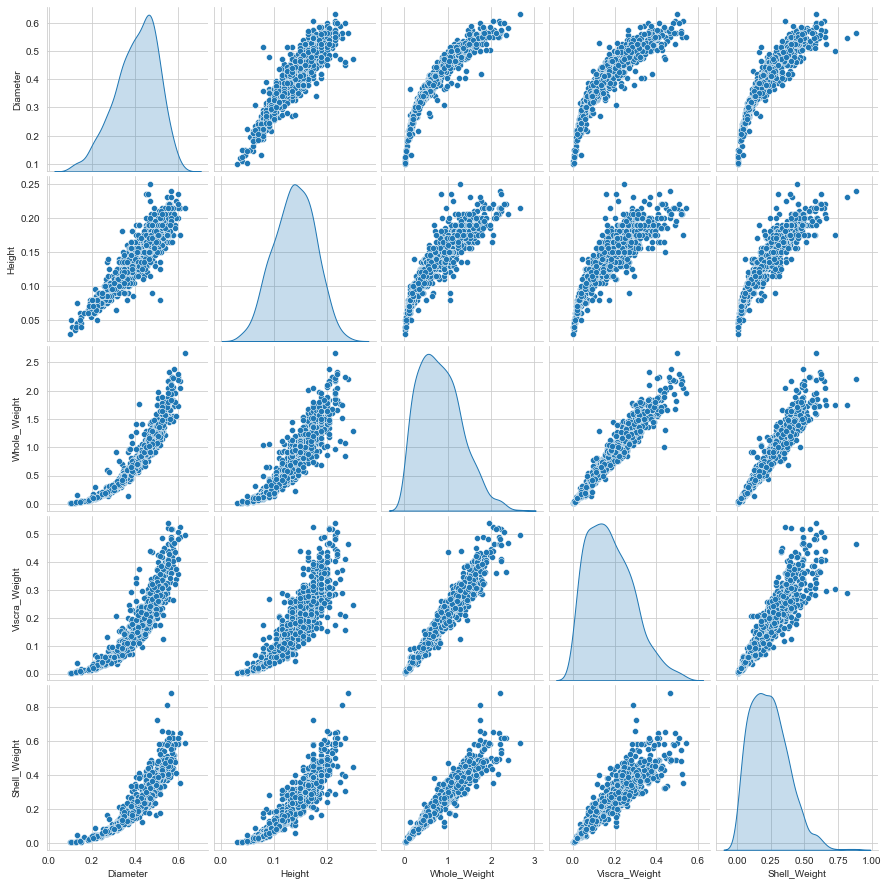

In [87]:
sns.pairplot(data_without_group, diag_kind='kde', markers='o')

plt.show()

In [92]:
new_df['Diameter'] = pd.to_numeric(new_df['Diameter'], errors='coerce')
new_df.loc[new_df['Diameter'] > 0.4, 'Diameter'] = 'BIG'
new_df.loc[new_df['Diameter'] <= 0.4, 'Diameter'] = 'SMALL'
counts = new_df.groupby(['Group', 'Diameter']).size().unstack(fill_value=0)

# 결과 출력
print(counts)

Diameter  SMALL
Group          
0.0          39
1.0         412


C:\Users\jhjjh\AppData\Local\Temp\ipykernel_27784\1444701226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Diameter'] = pd.to_numeric(new_df['Diameter'], errors='coerce')
C:\Users\jhjjh\AppData\Local\Temp\ipykernel_27784\1444701226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.loc[new_df['Diameter'] > 0.4, 'Diameter'] = 'BIG'
